In [1]:
import numpy as np
import sys 
import cv2


In [5]:
def call(pos):
    img[:]=(img1*(pos/255.)).astype(np.uint8)
    cv2.imshow('1',img)

img = cv2.imread('./test/fig/puppy.bmp')
img1=img.copy()



cv2.imshow('1',img)

cv2.createTrackbar('2','1',0,255, call)

cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
def call(event,x,y,flags,param):
    global oldx,oldy
    if event ==cv2.EVENT_LBUTTONDOWN:
        oldx,oldy =x,y
    elif event==cv2.EVENT_MOUSEMOVE:
        if flags ==cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(oldx,oldy),(x,y),(0,0,255),10,cv2.LINE_AA)
            cv2.imshow('1',img)
            oldx,oldy = x,y
    
    
        


img= np.ones((600,600,3), np.uint8)*255

cv2.imshow('1',img)
cv2.setMouseCallback('1',call)

while True:
    key=cv2.waitKey()
    if key == 27:
        break
    elif key ==ord('s'):
        print('img saved')
        cv2.imwrite('11.png',img)

cv2.destroyAllWindows()

img saved


In [6]:
cap=cv2.VideoCapture(0)

if not cap.isOpened():
    print('camera failed')
    sys.exit()
    
w= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('1.avi',fourcc,fps,(w,h))



while True:
    ret,frame = cap.read()
    if not ret:
        print('failed')
        break
    out.write(frame)
    cv2.imshow('1',frame)
    
    key= cv2.waitKey(20)
    
    if key ==27:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

In [19]:
img = np.full((600,1200,3), (255,255,0), np.uint8)


cv2.line(img,(100,100),(300,200),(0,0,255),10,cv2.LINE_AA)
cv2.arrowedLine(img, (300,200),(300,400),(0,255,0),10,cv2.LINE_AA)
cv2.rectangle(img,(100,400),(200,500),(242,124,221),10,cv2.LINE_AA)
cv2.rectangle(img,(120,420,60,60),(0,0,255),-1,cv2.LINE_AA)
cv2.circle(img,(600,300),50,(123,123,123),5,cv2.LINE_AA)
cv2.ellipse(img,(800,300),(50,200),-10,0,270,(255,25,100),5,cv2.LINE_AA)

cv2.putText(img,'정인', (800,100),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1,cv2.LINE_AA)

pts = np.array([[250,200],[350,300],[350,200],[250,300]])

cv2.polylines(img, [pts],True,(255,0,0),10,cv2.LINE_AA)

cv2.imshow('1',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
src = cv2.imread('./1/fig/lenna.bmp',1)


#dst = np.clip(src+100.,0,255).astype(np.uint8)
dst = cv2.add(src,(100,100,100,0))


cv2.imshow('1',src)
cv2.imshow('2',dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
import matplotlib.pyplot as plt

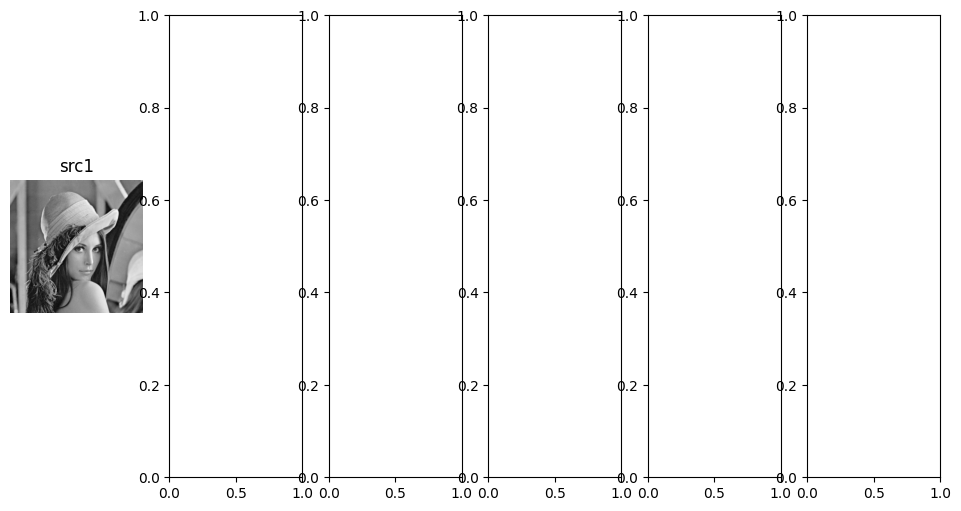

In [56]:
src1 =cv2.imread('./1/fig/lenna256.bmp',0)
src2 = np.zeros_like(src1, np.uint8)
cv2.circle(src2,(128,128,),100,200,-1)
cv2.circle(src2,(128,128,),50,50,-1)


dst1 =cv2.add(src1,src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0,)

dst3 = cv2.subtract(src1,src2)
dst4 =cv2.absdiff(src1,src2)

# cv2.imshow('1',src1)
# cv2.imshow('2',src2)
# cv2.imshow('3',dst3)
# cv2.imshow('4',dst4)

fig,ax =plt.subplots(2,3,figsize=(12,6))

ax[0].imshow(src1, cmap='gray'), ax[0].axis('off'), ax[0].set_title('src1')


plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [75]:
src = cv2.imread('./1/fig/flowers.jpg')
src_hsv= cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(src_hsv)


v_ = cv2.add(v,50)
dst1 = cv2.merge((h,s,v_))
dst1 = cv2.cvtColor(dst1,cv2.COLOR_HSV2BGR)
cv2.imshow('1',src)
cv2.imshow('2',h)
cv2.imshow('3',s)
cv2.imshow('4',v)
cv2.imshow('5',dst1)

cv2.waitKey()
cv2.destroyAllWindows()

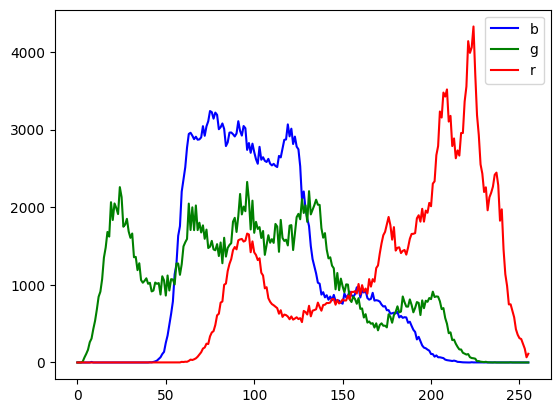

In [83]:
src = cv2.imread('./1/fig/lenna.bmp',1)


B =cv2.calcHist([src],[0],None,[256],[0,256])
G =cv2.calcHist([src],[1],None,[256],[0,256])
R =cv2.calcHist([src],[2],None,[256],[0,256])
plt.plot(B,color='b',label='b')
plt.plot(G,color='g',label='g')
plt.plot(R,color='r',label='r')
plt.legend()
plt.show()


cv2.imshow('1',src)



cv2.waitKey()

cv2.destroyAllWindows()

In [103]:
src =cv2.imread('./1/fig/lenna.bmp',0)


imin,imax,_,_ = cv2.minMaxLoc(src)


#dst_norm = np.clip( (src-imin)*255.0/(imax-imin)+0,0,255 ).astype(np.uint8)
dst_norm = cv2.normalize(src,None,0,255,cv2.NORM_MINMAX)

dst_equal = cv2.equalizeHist(src)


# dst1 = cv2.merge((h,s,dst_norm))
# dst1 = cv2.cvtColor(dst1,cv2.COLOR_HSV2BGR)

# dst2 = cv2.merge(h,s,dst_equal)
# dst2 = cv2.cvtColor(dst2,cv2.COLOR_HSV2BGR)

cv2.imshow('1',src)
cv2.imshow('2',dst_norm)
cv2.imshow('3',dst_equal)



cv2.waitKey()

cv2.destroyAllWindows()

In [113]:
src = cv2.imread('./2/fig/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)


src_hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(src_hsv)
dst_norm = cv2.normalize(v,None,0,255,cv2.NORM_MINMAX)
dst_equal = cv2.equalizeHist(v)


dst1 = cv2.merge((h,s,dst_norm))
dst1 = cv2.cvtColor(dst1,cv2.COLOR_HSV2BGR)

dst2 = cv2.merge((h,s,dst_equal))
dst2 = cv2.cvtColor(dst2,cv2.COLOR_HSV2BGR)

cv2.imshow('1',src)
cv2.imshow('2',dst1)
cv2.imshow('3',dst2)


cv2.imshow('1',src)

cv2.waitKey()

cv2.destroyAllWindows()

In [159]:
src =cv2.imread('./2/fig/palette.png')
src_hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
# dst1 = cv2.inRange(src,(0,0,100),(50,50,255))

dst1 = cv2.inRange(src_hsv,(110,150,0),(130,255,255))


cv2.imshow('1',src)
cv2.imshow('2',dst1)

cv2.waitKey()

cv2.destroyAllWindows()